<a href="https://colab.research.google.com/github/Aayush-Mishra07/Mutual-Fund-Analysis/blob/main/MF(main).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mutual Fund Algo
This notebook has some rough implementations of the made algorithm or logic to shortlist good schemes from data of mutual fund large cap schemes.In this notebook,I have tried to implement some roughly made logics for shortlisting schemes and checking their outcome.

### 1.Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 2.Reading the uploaded file of mutual fund large cap schemes in excel format and converting it into pandas dataframe to be able to perform operations on it.

In [ ]:
df = pd.read_excel('/content/MF Large Cap.xlsx')

In [ ]:
df.head()

,Scheme Name,AMFI Code,ISIN Code,Status,Category_,Asset Type,Sub Category,AUM (Cr.),Month End,Exp. Ratio,...,5 Years,10 Years,SINCE INCEPTION,SD,Beta (Correlation),Treynor,Sharpe,Jensen`s Alpha,Sortino,Month End.1
0,Aditya Birla SL Frontline Equity (Trigger Faci...,0,INF209K01KI9,Active,Large Cap Fund,Equity,Large Cap Fund,22498.061000,202305,1.69,...,11.4157,14.5850,19.0248,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745,202305
1,Aditya Birla SL Frontline Equity Fund(G),103174,INF209K01BR9,Active,Large Cap Fund,Equity,Large Cap Fund,22498.061000,202305,1.69,...,11.4157,14.5850,18.9594,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745,202305
2,Axis Bluechip Fund-Reg(G),112277,INF846K01164,Active,Large Cap Fund,Equity,Large Cap Fund,33644.250799,202305,1.56,...,10.8192,13.8767,11.8457,4.3818,0.9467,1.0408,0.2249,-0.5496,0.4492,202305
3,Bandhan Large Cap Fund-Reg(G),108799,INF194K01516,Active,Large Cap Fund,Equity,Large Cap Fund,1120.615100,202305,2.16,...,10.8940,12.2178,10.2756,4.2889,0.9238,1.4320,0.3084,-0.1750,0.6323,202305
4,Bank of India Bluechip Fund-Reg(G),148982,INF761K01FO7,Active,Large Cap Fund,Equity,Large Cap Fund,113.389700,202305,2.46,...,0.0000,0.0000,5.9049,4.5393,0.9918,0.0112,0.0024,-0.3444,0.0044,202305


# 3.Defining new Parameters:
We define some new parameters made out of other smaller datafields with each datafield assigned a specific weight.We define 2 parameters 'Returns_New' and 'Risk_New' for every scheme that is calculated as shown in the code below

In [ ]:
parameters = {
    'Returns': {'10 Years': 0.05, '5 Years': 0.8,'3 Years':0.05,'1 Year':0.05,'9 Months':0.025,'6 Months':0.025 },
    'Risk': {'SD': 0.5, 'Sharpe': 0.2,'Sortino':0.1,'Treynor':0.1,'Beta (Correlation)':0.1},


}

In [ ]:
for index, row in df.iterrows():
    # Initialize new parameter variables
    returns_weighted_sum = 0
    risk_weighted_sum = 0

    # Calculate weighted sum for Returns
    for return_param, return_weight in parameters['Returns'].items():
        returns_weighted_sum += row[return_param] * return_weight

    # Calculate weighted sum for Risk
    for risk_param, risk_weight in parameters['Risk'].items():
        risk_weighted_sum += row[risk_param] * risk_weight

    # Assign the calculated values to new parameters
    df.at[index, 'Returns_New'] = returns_weighted_sum
    df.at[index, 'Risk_New'] = risk_weighted_sum

We can see it below that the newly created parameters have been added as new columns at the right:

In [ ]:
df.head()

,Scheme Name,AMFI Code,ISIN Code,Status,Category_,Asset Type,Sub Category,AUM (Cr.),Month End,Exp. Ratio,...,SINCE INCEPTION,SD,Beta (Correlation),Treynor,Sharpe,Jensen`s Alpha,Sortino,Month End.1,Returns_New,Risk_New
0,Aditya Birla SL Frontline Equity (Trigger Faci...,0,INF209K01KI9,Active,Large Cap Fund,Equity,Large Cap Fund,22498.061000,202305,1.69,...,19.0248,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745,202305,12.549935,2.57736
1,Aditya Birla SL Frontline Equity Fund(G),103174,INF209K01BR9,Active,Large Cap Fund,Equity,Large Cap Fund,22498.061000,202305,1.69,...,18.9594,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745,202305,12.549935,2.57736
2,Axis Bluechip Fund-Reg(G),112277,INF846K01164,Active,Large Cap Fund,Equity,Large Cap Fund,33644.250799,202305,1.56,...,11.8457,4.3818,0.9467,1.0408,0.2249,-0.5496,0.4492,202305,11.146300,2.47955
3,Bandhan Large Cap Fund-Reg(G),108799,INF194K01516,Active,Large Cap Fund,Equity,Large Cap Fund,1120.615100,202305,2.16,...,10.2756,4.2889,0.9238,1.4320,0.3084,-0.1750,0.6323,202305,11.890373,2.50494
4,Bank of India Bluechip Fund-Reg(G),148982,INF761K01FO7,Active,Large Cap Fund,Equity,Large Cap Fund,113.389700,202305,2.46,...,5.9049,4.5393,0.9918,0.0112,0.0024,-0.3444,0.0044,202305,1.351855,2.37087


# 4.Shortlisting top5 schemes:
Now we get top 5 schemes based on sorting it in descending order according to 'New Returns' column and then according to 'New Risk' column

In [ ]:
topreturns=df.sort_values(by='Returns_New',ascending=False).head(5)
toprisk=df.sort_values(by='Risk_New',ascending=False).head(5)
topreturns

,Scheme Name,AMFI Code,ISIN Code,Status,Category_,Asset Type,Sub Category,AUM (Cr.),Month End,Exp. Ratio,...,SINCE INCEPTION,SD,Beta (Correlation),Treynor,Sharpe,Jensen`s Alpha,Sortino,Month End.1,Returns_New,Risk_New
23,Nippon India Large Cap Fund(G),106235,INF204K01562,Active,Large Cap Fund,Equity,Large Cap Fund,14171.019900,202305,1.74,...,12.0309,4.7756,1.0234,1.9197,0.4114,0.3053,0.9241,202305,15.413338,2.85680
6,Canara Rob Bluechip Equity Fund-Reg(G),113221,INF760K01AR3,Active,Large Cap Fund,Equity,Large Cap Fund,9600.440700,202305,1.70,...,12.3170,4.0836,0.9019,1.4889,0.3288,-0.1195,0.6862,202305,14.334215,2.41526
11,HDFC Top 100 Fund(G),102000,INF179K01BE2,Active,Large Cap Fund,Equity,Large Cap Fund,23821.339300,202305,1.70,...,18.6794,4.6285,0.9804,1.7511,0.3709,0.2344,0.8485,202305,13.909000,2.74643
26,SBI BlueChip Fund-Reg(G),103504,INF200K01180,Active,Large Cap Fund,Equity,Large Cap Fund,36876.319600,202305,1.63,...,11.7092,4.4509,0.9755,1.6711,0.3663,0.0485,0.8197,202305,13.859828,2.64534
14,ICICI Pru Bluechip Fund(G),108466,INF109K01BL4,Active,Large Cap Fund,Equity,Large Cap Fund,37016.001183,202305,1.61,...,14.1197,4.1291,0.9000,1.7513,0.3817,0.2154,0.8425,202305,13.847890,2.49027


In [ ]:
toprisk

,Scheme Name,AMFI Code,ISIN Code,Status,Category_,Asset Type,Sub Category,AUM (Cr.),Month End,Exp. Ratio,...,SINCE INCEPTION,SD,Beta (Correlation),Treynor,Sharpe,Jensen`s Alpha,Sortino,Month End.1,Returns_New,Risk_New
23,Nippon India Large Cap Fund(G),106235,INF204K01562,Active,Large Cap Fund,Equity,Large Cap Fund,14171.019900,202305,1.74,...,12.0309,4.7756,1.0234,1.9197,0.4114,0.3053,0.9241,202305,15.413338,2.85680
11,HDFC Top 100 Fund(G),102000,INF179K01BE2,Active,Large Cap Fund,Equity,Large Cap Fund,23821.339300,202305,1.70,...,18.6794,4.6285,0.9804,1.7511,0.3709,0.2344,0.8485,202305,13.909000,2.74643
9,Franklin India Bluechip Fund(G),100471,INF090I01171,Active,Large Cap Fund,Equity,Large Cap Fund,6520.839001,202305,1.82,...,19.0898,4.7134,0.9517,1.4574,0.2943,-0.0519,0.6418,202305,10.878398,2.72065
30,Taurus Largecap Equity Fund-Reg(G),101209,INF044D01773,Active,Large Cap Fund,Equity,Large Cap Fund,34.063900,202305,2.61,...,9.9052,4.7752,0.9917,1.2315,0.2558,-0.3867,0.5015,202305,9.586453,2.71123
12,HSBC Large Cap Fund(G),101594,INF336L01016,Active,Large Cap Fund,Equity,Large Cap Fund,1484.257757,202305,2.18,...,18.7275,4.5977,1.0009,1.3517,0.2943,-0.1604,0.6086,202305,11.894608,2.65383


Here we see that on sorting based on only Returns_New,we get some different schemes than when sorting it based on only Risk_New,this is because some schemes that might have good returns but not a good risk profile and some schemes that have a good risk profile might not give good returns.So we need a metric that combines these parameters and other few necessary parameters.This metric is defined as 'score' here.

In [ ]:
MF_weights ={'Returns_New':0.45,'Risk_New':0.2,'AUM (Cr.)':0.05,'Exp. Ratio':0.15,'Jensen`s Alpha':0.15}

In [ ]:
for index, row in df.iterrows():
    # Initialize new parameter variables
    score = 0


    # Calculate weighted sum for Returns
    for return_param, return_weight in MF_weights.items():
        score += row[return_param] * return_weight


    # Assign the calculated values to new parameters
    df.at[index, 'Score'] = score


In [ ]:
df.head()

,Scheme Name,AMFI Code,ISIN Code,Status,Category_,Asset Type,Sub Category,AUM (Cr.),Month End,Exp. Ratio,...,SD,Beta (Correlation),Treynor,Sharpe,Jensen`s Alpha,Sortino,Month End.1,Returns_New,Risk_New,Score
0,Aditya Birla SL Frontline Equity (Trigger Faci...,0,INF209K01KI9,Active,Large Cap Fund,Equity,Large Cap Fund,22498.061000,202305,1.69,...,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745,202305,12.549935,2.57736,1131.335063
1,Aditya Birla SL Frontline Equity Fund(G),103174,INF209K01BR9,Active,Large Cap Fund,Equity,Large Cap Fund,22498.061000,202305,1.69,...,4.3418,0.9560,1.6205,0.3568,0.1038,0.7745,202305,12.549935,2.57736,1131.335063
2,Axis Bluechip Fund-Reg(G),112277,INF846K01164,Active,Large Cap Fund,Equity,Large Cap Fund,33644.250799,202305,1.56,...,4.3818,0.9467,1.0408,0.2249,-0.5496,0.4492,202305,11.146300,2.47955,1687.875845
3,Bandhan Large Cap Fund-Reg(G),108799,INF194K01516,Active,Large Cap Fund,Equity,Large Cap Fund,1120.615100,202305,2.16,...,4.2889,0.9238,1.4320,0.3084,-0.1750,0.6323,202305,11.890373,2.50494,62.180161
4,Bank of India Bluechip Fund-Reg(G),148982,INF761K01FO7,Active,Large Cap Fund,Equity,Large Cap Fund,113.389700,202305,2.46,...,4.5393,0.9918,0.0112,0.0024,-0.3444,0.0044,202305,1.351855,2.37087,7.069334


Now we get shortlist 5 schemes based on 'score':

In [ ]:
topfive=df.sort_values(by='Score',ascending=False).head(5)
topfive

,Scheme Name,AMFI Code,ISIN Code,Status,Category_,Asset Type,Sub Category,AUM (Cr.),Month End,Exp. Ratio,...,SD,Beta (Correlation),Treynor,Sharpe,Jensen`s Alpha,Sortino,Month End.1,Returns_New,Risk_New,Score
14,ICICI Pru Bluechip Fund(G),108466,INF109K01BL4,Active,Large Cap Fund,Equity,Large Cap Fund,37016.001183,202305,1.61,...,4.1291,0.9000,1.7513,0.3817,0.2154,0.8425,202305,13.847890,2.49027,1857.803474
26,SBI BlueChip Fund-Reg(G),103504,INF200K01180,Active,Large Cap Fund,Equity,Large Cap Fund,36876.319600,202305,1.63,...,4.4509,0.9755,1.6711,0.3663,0.0485,0.8197,202305,13.859828,2.64534,1850.833745
22,Mirae Asset Large Cap Fund-Reg(G),107578,INF769K01010,Active,Large Cap Fund,Equity,Large Cap Fund,34640.460769,202305,1.55,...,4.2705,0.9351,1.5494,0.3393,0.0350,0.7291,202305,12.900170,2.52447,1738.570759
2,Axis Bluechip Fund-Reg(G),112277,INF846K01164,Active,Large Cap Fund,Equity,Large Cap Fund,33644.250799,202305,1.56,...,4.3818,0.9467,1.0408,0.2249,-0.5496,0.4492,202305,11.146300,2.47955,1687.875845
11,HDFC Top 100 Fund(G),102000,INF179K01BE2,Active,Large Cap Fund,Equity,Large Cap Fund,23821.339300,202305,1.70,...,4.6285,0.9804,1.7511,0.3709,0.2344,0.8485,202305,13.909000,2.74643,1198.165461


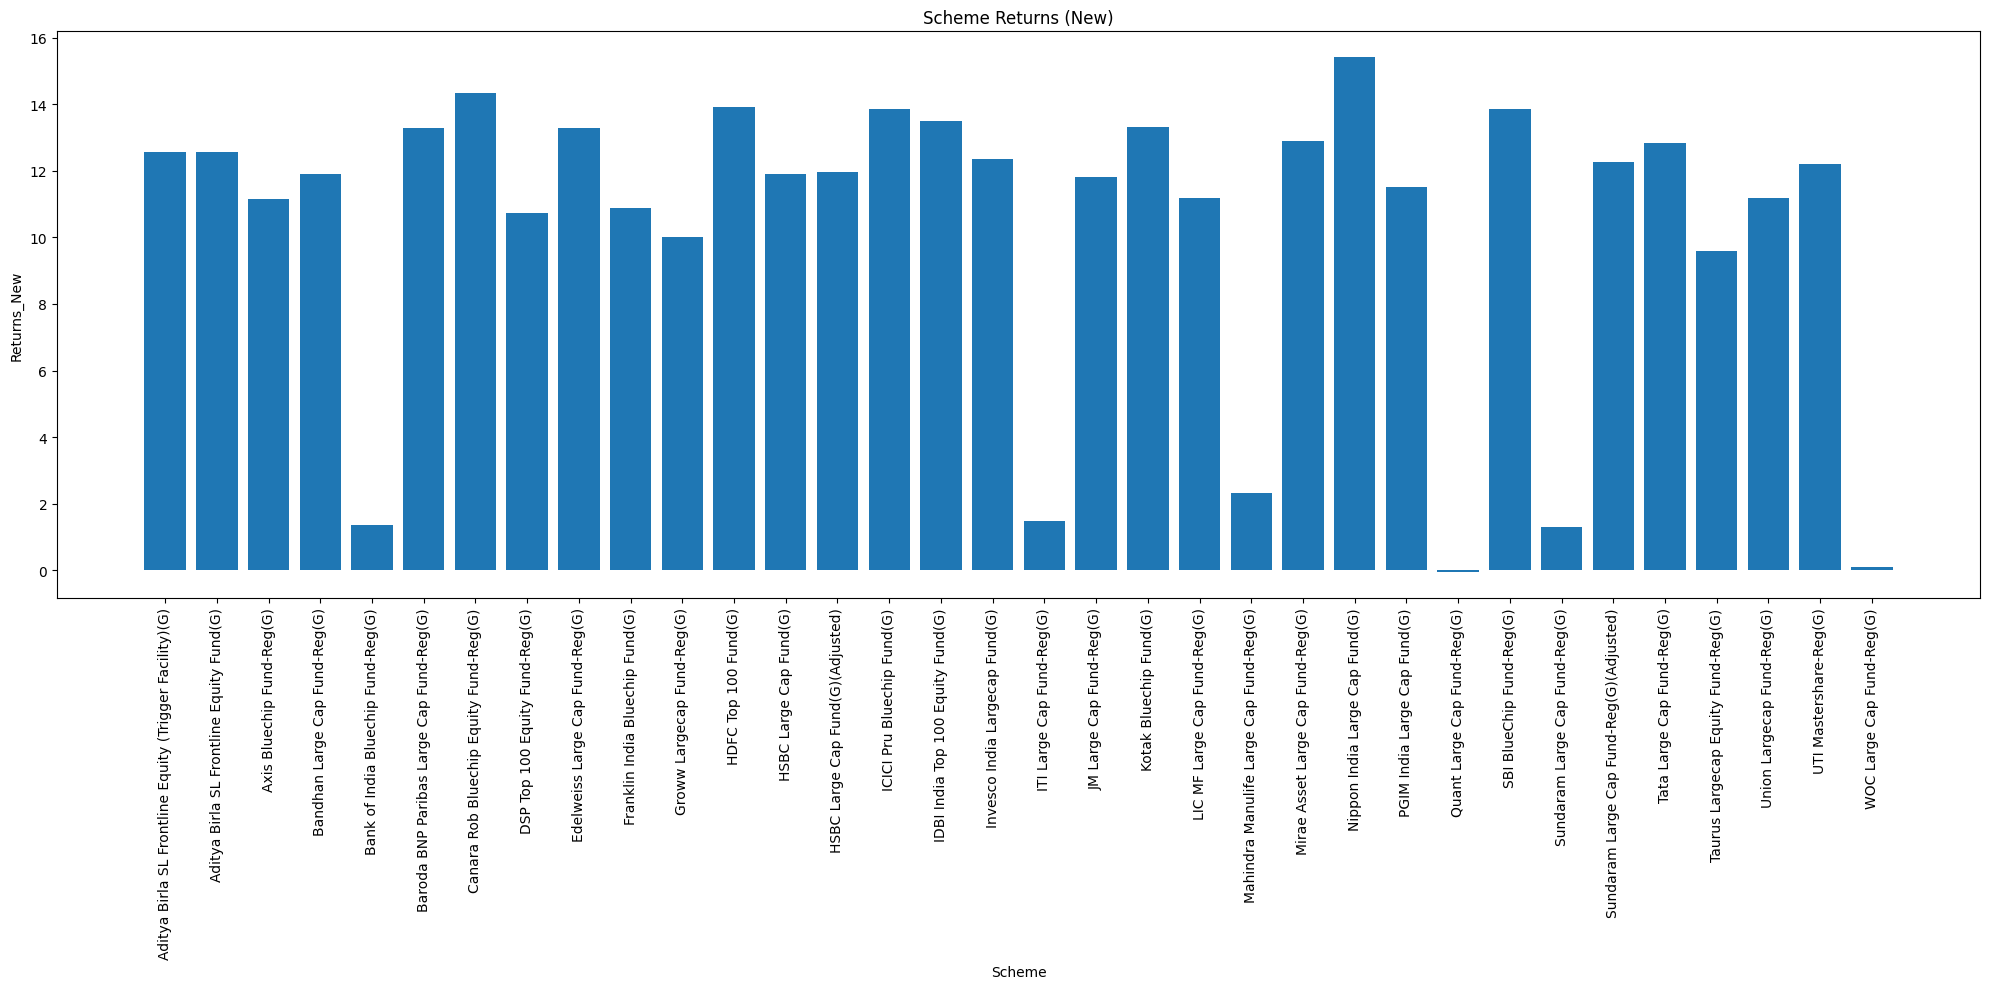

In [ ]:

plt.figure(figsize=(20,10))
plt.bar(df['Scheme Name'], df['Returns_New'])
plt.xlabel('Scheme')
plt.ylabel('Returns_New')
plt.title('Scheme Returns (New)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing
plt.show()


# 5.Conclusion:
We see that there are a few funds which are common in the top5 lists.These funds outperform other funds in a variety of parameters and hence they are good funds among large caps.These funds are:


In [ ]:
top=topreturns.merge(topfive, on='Scheme Name',how='inner')
top

,Scheme Name,AMFI Code_x,ISIN Code_x,Status_x,Category__x,Asset Type_x,Sub Category_x,AUM (Cr.)_x,Month End_x,Exp. Ratio_x,...,SD_y,Beta (Correlation)_y,Treynor_y,Sharpe_y,Jensen`s Alpha_y,Sortino_y,Month End.1_y,Returns_New_y,Risk_New_y,Score
0,HDFC Top 100 Fund(G),102000,INF179K01BE2,Active,Large Cap Fund,Equity,Large Cap Fund,23821.339300,202305,1.70,...,4.6285,0.9804,1.7511,0.3709,0.2344,0.8485,202305,13.909000,2.74643,1198.165461
1,SBI BlueChip Fund-Reg(G),103504,INF200K01180,Active,Large Cap Fund,Equity,Large Cap Fund,36876.319600,202305,1.63,...,4.4509,0.9755,1.6711,0.3663,0.0485,0.8197,202305,13.859828,2.64534,1850.833745
2,ICICI Pru Bluechip Fund(G),108466,INF109K01BL4,Active,Large Cap Fund,Equity,Large Cap Fund,37016.001183,202305,1.61,...,4.1291,0.9000,1.7513,0.3817,0.2154,0.8425,202305,13.847890,2.49027,1857.803474
